# **Analysing Structured Data with PyTorch**

Introduction to Pytorch for image dataset
_____________________________________________
# **Predicting Hand-Written Digits (multi-class classification)**

# **Dataset**

The dataset we will be using is the famous MNIST.

The data was originally published by Professor Dr. Hans Hofmann Institut f"ur Statistik und "Okonometrie Universit"at Hamburg FB Wirtschaftswissenschaften Von-Melle-Park 5 2000 Hamburg 13

Each observation is an black and white image of size 28 by 28 representing a single hand-written digit.

This dataset is avalaible from Kaggle: MNIST

# **Objective**

Our goal is to build a Neural Network model that can predict accurately the hand-written digit from an image.

# **Instructions**

This is a guided exercise where some of the code have already been pre-defined. Your task is to fill the remaining part of the code (it will be highlighted with placehoders) to train and evaluate your model.

This exercise is split in several parts:

1. Loading and Exploration of the Dataset
2. Preparing the Dataset
3. Defining the Architecture of the Multi-Layer Perceptron
4. Training and Evaluation of the Model
5. Analysing the Results

## Exercise 2 (to be completed in 20 minutes)

### 1. Loading and Exploration of the Dataset

**[1.1]** First we need to import the relevant class and libraries that contains the dataset from PyTorch

In [1]:
# Placeholder for student's code

In [2]:
# Solution
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor, Lambda

**[1.2]** Look at the version of torchvision

In [3]:
# Placeholder for student's code

In [4]:
# Solution
torchvision.__version__

'0.20.1+cu124'

**[1.3]** Apply transformation using compose class. Set the image view parameter in Lambda function as 784. The MNIST (Modified National Institute of Standards and Technology) data consists of 60,000 training images and 10,000 test images. Each image is a 28 x 28 (784 pixels) handwritten digit from "0" to "9."

In [5]:
# Placeholder for student's code

In [6]:
# Solution
transform = Compose([
        ToTensor(),
        Lambda(lambda image: image.view(784))
])

**[1.4]** Then we will load the dataset and save the different sets into separate variables: data_train, data_test

In [7]:
# Placeholder for student's code

In [8]:
# Solution
data_train = MNIST (root = "./", download = True, train = True, transform = transform)
data_test = MNIST (root = "./", download = True, train = False, transform = transform)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 52.7MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.61MB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 14.2MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.51MB/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



### 2.   Preparing the Dataset

[2.1] We already prepared the dataset in section 1.3 by introducing lambda function. Now, lets have a look at the maximum value and minimum value of data train[0][0].

In [9]:
# Placeholder for student's code

In [10]:
# Solution
print(data_train[0][0].min())
print(data_train[0][0].max())
print(data_test[0][0].min())
print(data_test[0][0].max())

tensor(0.)
tensor(1.)
tensor(0.)
tensor(1.)


**[2.2]** Look at the dimensions of data_train using the [.shape] method

In [11]:
# Placeholder for student's code

In [12]:
# Solution
print(data_train[0][0].shape)

torch.Size([784])


### 3.   Defining the Architecture of the Multi-Layer Perceptron

**[3.1]** Import `torch.nn` as `nn`, `torch.optim` as `optim` and `numpy` as `np`

In [13]:
# Placeholder for student's code

In [14]:
# Solution
import torch.nn as nn
import torch.optim as optim
import numpy as np

**[3.2]** We will set the seeds for Pytorch and Numpy in order to get reproducible results

In [15]:
# Placeholder for student's code

In [16]:
# Solution
torch.manual_seed(42)
np.random.seed(42)

**[3.3]** Then we will create a variable called `device` that will automatically select a GPU if available. Otherwise it will default to CPU.

In [17]:
# Placeholder for student's code

In [18]:
# Solution
device = 'cuda' if torch.cuda.is_available() else 'cpu'

**[3.4]** Now we will create a variable called `layer_1` by instantiating a nn.Linear() (i.e. a hidden layer) class with 512 fully connected neurons

In [19]:
# Placeholder for student's code

In [20]:
# Solution
layer_1 = nn.Linear(784, 512)

**[3.5]** Now we will create a hidden layer of 512 fully connected units and save it into a variable called `layer_2`

In [21]:
# Placeholder for student's code

In [22]:
# Solution
layer_2 = nn.Linear(512, 512)

**[3.6]** Then we will create a variable called `layer_top` that takes  512 neurons as input and connect to 10 output units

In [23]:
# Placeholder for student's code

In [24]:
# Solution
layer_top = nn.Linear(512, 10)

**[3.7]** Finally let's stack these layers with a ReLu in between using nn.Sequential() class and save it into a variable called `model`

In [25]:
# Placeholder for student's code

In [26]:
# Solution
model = nn.Sequential(
    layer_1,
    nn.ReLU(),
    layer_2,
    nn.ReLU(),
    layer_top
)

**[3.8]**  Print the architecture of `model`

In [27]:
# Placeholder for student's code

In [28]:
# Solution
model.to(device)
print (model)

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=10, bias=True)
)


### 4. Training and Evaluation of the Model

**[4.1]**  Instantiate a `nn.CrossEntropyLoss()` and save it into a variable called `criterion`

In [29]:
# Placeholder for student's code

In [30]:
# Solution
criterion = nn.CrossEntropyLoss()

**[4.2]**  Instantiate a `torch.optim.Adam()` optimizer with the model's parameters and 0.001 as learning rate and save it into a variable called `optimizer`

In [31]:
# Placeholder for student's code

In [32]:
# Solution
optimizer = optim.Adam(model.parameters(), lr=0.001)

**[4.3]**  Now we will call the DataLoader function that iteratively loads data based on batch size, shuffle and save it into two different variables called `dataloader_train` and `dataloader_test`. Set the `BATCH_SIZE` to 64.

In [33]:
# Placeholder for student's code

In [34]:
# Solution
BATCH_SIZE = 64
dataloader_train = DataLoader(data_train, batch_size = BATCH_SIZE, shuffle = True)
dataloader_test = DataLoader(data_test, batch_size = BATCH_SIZE, shuffle=True)

**[4.4]**  Let's have a look at the length of `dataloader_train`.

In [35]:
# Placeholder for student's code

In [36]:
# Solution
len(dataloader_train)

938

**[4.5]** **Training:** Now it is time to train our model. Set the `EPOCHS` to 5 and create a for loop that will iterate based on the EPOCHS value. A nested loop is initiated that extracts data and target from dataloader_train and introduce the following logics:
- reset the gradients
- perform the forward propagation and get the model predictions
- calculate the loss between the predictions and the actuals
- perform back propagation
- update the weights
- Count the total loss

In [37]:
# Placeholder for student's code

In [38]:
# Solution
EPOCHS = 5
for i in range(EPOCHS):
    total_loss = 0
    for data, target in dataloader_train:
        data = data.to(device)  # Move data to the same device as the model
        target = target.to(device)  # Move target to the same device as the model
        optimizer.zero_grad() #Zero gradients
        outputs = model(data) # Forward Propagation to get predicted outcome
        loss = criterion(outputs, target) # Compute the loss
        loss.backward()  # Back propagation
        optimizer.step()  # Update the weights
        total_loss += loss.item()

    total_loss /= len(dataloader_train)
    print(f"EPOCH {i}: 'Loss' {total_loss:.4f}")


EPOCH 0: 'Loss' 0.2233
EPOCH 1: 'Loss' 0.0866
EPOCH 2: 'Loss' 0.0582
EPOCH 3: 'Loss' 0.0427
EPOCH 4: 'Loss' 0.0322


**[4.6]** Set the `input_size`. MNIST images are 28x28 pixels.

In [39]:
# Placeholder for student's code

In [40]:
# Solution
input_size = 28 * 28  # MNIST images are 28x28 pixels

**[4.7]** **Testing:** Now it is time to test our model. Initiate the `model.eval()` along with `torch.no_grad()` to turn off the gradients. Finally calculate the total and correct value.

In [41]:
# Placeholder for student's code

In [42]:
# Solution
from sklearn.metrics import confusion_matrix
model.eval()
correct = 0
total = 0
# Get the predictions for the test dataset
predicted_labels = []
true_labels = []

with torch.no_grad():
    for data, target in dataloader_test:
        data = data.view(-1, input_size)
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
        predicted_labels.extend(predicted.tolist())
        true_labels.extend(target.tolist())

### 5. Analysing the Results

**[5.1]** Finally let's use our model to make predictions on the testing set. And let's print the prediction for the first observation

In [43]:
# Placeholder for student's code

In [44]:
print (outputs[0])

tensor([ 0.9613, -3.5435, -4.9102, -5.5899, -4.6706,  0.5420,  7.3700, -7.0589,
         1.2095, -3.7191])


**[5.2]**  The output from the model is the probability for each output class. In order to get the final predicted value, we need to the [.argmax()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html) method from numpy.

In [45]:
# Placeholder for student's code

In [46]:
pred_test = np.argmax(outputs, 1)
pred_test[0]

tensor(6)

**[5.3]** Let's compare this prediction to the actual true value

In [47]:
# Placeholder for student's code

In [48]:
target[0]

tensor(6)

**[5.4]** Let's calculate the `accuracy` of the model by dividing the correct value with the total value and print the `accuracy`.

In [49]:
# Placeholder for student's code

In [50]:
# Solution
accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 97.96%


**[5.5]** Now we can calculate the confusion matrix using the [confusion_matrix()] (https://pytorch.org/ignite/generated/ignite.metrics.confusion_matrix.ConfusionMatrix.html) method from PyTorch.

In [51]:
# Placeholder for student's code

In [52]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

**[5.6]** Let's plot the confusion matrix.

In [53]:
# Placeholder for student's code

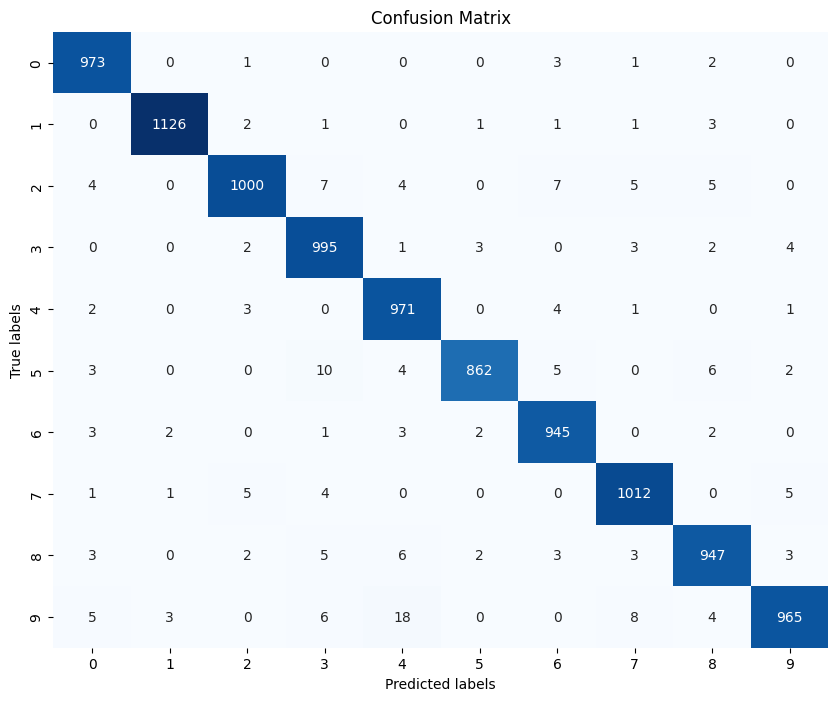

In [54]:
# Solution
# Import the packages for plotting the graph
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Excellent! You just completed the first exercise of this lab. We built a custom MLP with PyTorch for predicting the right handwritten digit from the MNIST dataset..

In the next exercise, you will be building a binary classifier with minimal guidance.